# The Sparks Foundation Internship-GRIP-Oct-2022

## Data Science and Business Analytics Intern

### Author : Balaji Banavanur

### Task-02 : Prediction using Unsupervised ML

In [26]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [28]:
iris_data = pd.read_csv("D:/GRIP_Intern@2022/Task-02/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# Shape of data
data.shape

(150, 6)

#### The number of rows is 150 and columns is 6

In [9]:
data.columns
# Column names

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
data.memory_usage()

Index             128
Id               1200
SepalLengthCm    1200
SepalWidthCm     1200
PetalLengthCm    1200
PetalWidthCm     1200
Species          1200
dtype: int64

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


#### Descriptive Stastistics of Hours and Scores 
#### T-Transpose

#### There are no missing values as all columns row count is same

In [14]:
data.duplicated().sum()

0

#### There are no duplicate values

<AxesSubplot:>

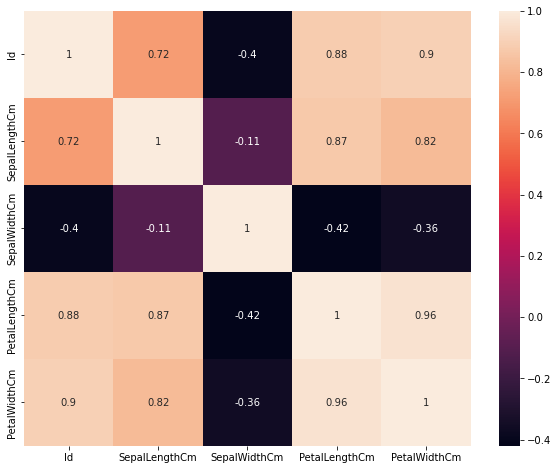

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

### Data Analysis

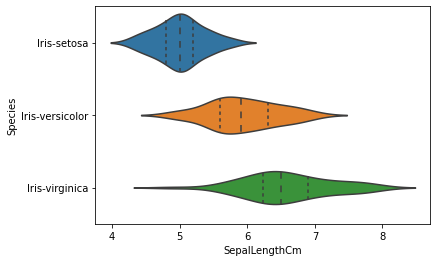

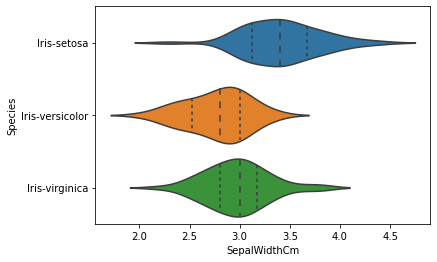

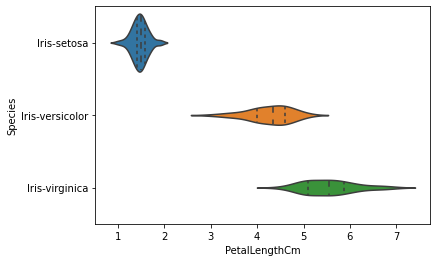

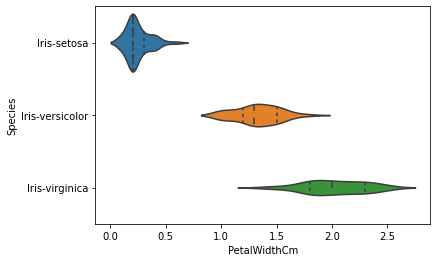

In [29]:
sepal_len = sns.violinplot(y='Species',x='SepalLengthCm',data=iris_data,inner='quartile')
plt.show()
sepal_wid = sns.violinplot(y='Species',x='SepalWidthCm',data=iris_data,inner='quartile')
plt.show()
petal_len = sns.violinplot(y='Species',x='PetalLengthCm',data=iris_data,inner='quartile')
plt.show()
petal_wid = sns.violinplot(y='Species',x='PetalWidthCm',data=iris_data,inner='quartile')
plt.show()

#### Plotting Sepal Length v/s Sepal Width Graph

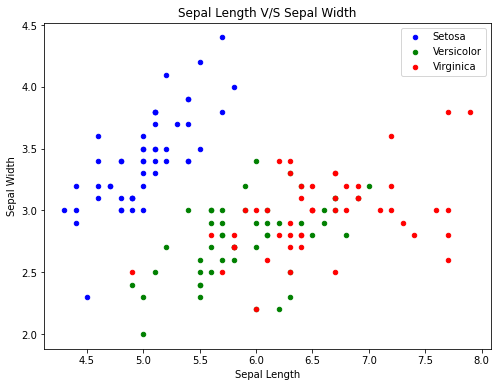

In [31]:
fig = iris_data[iris_data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label="Setosa")
iris_data[iris_data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label="Versicolor",ax=fig)
iris_data[iris_data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label="Virginica",ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length V/S Sepal Width')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

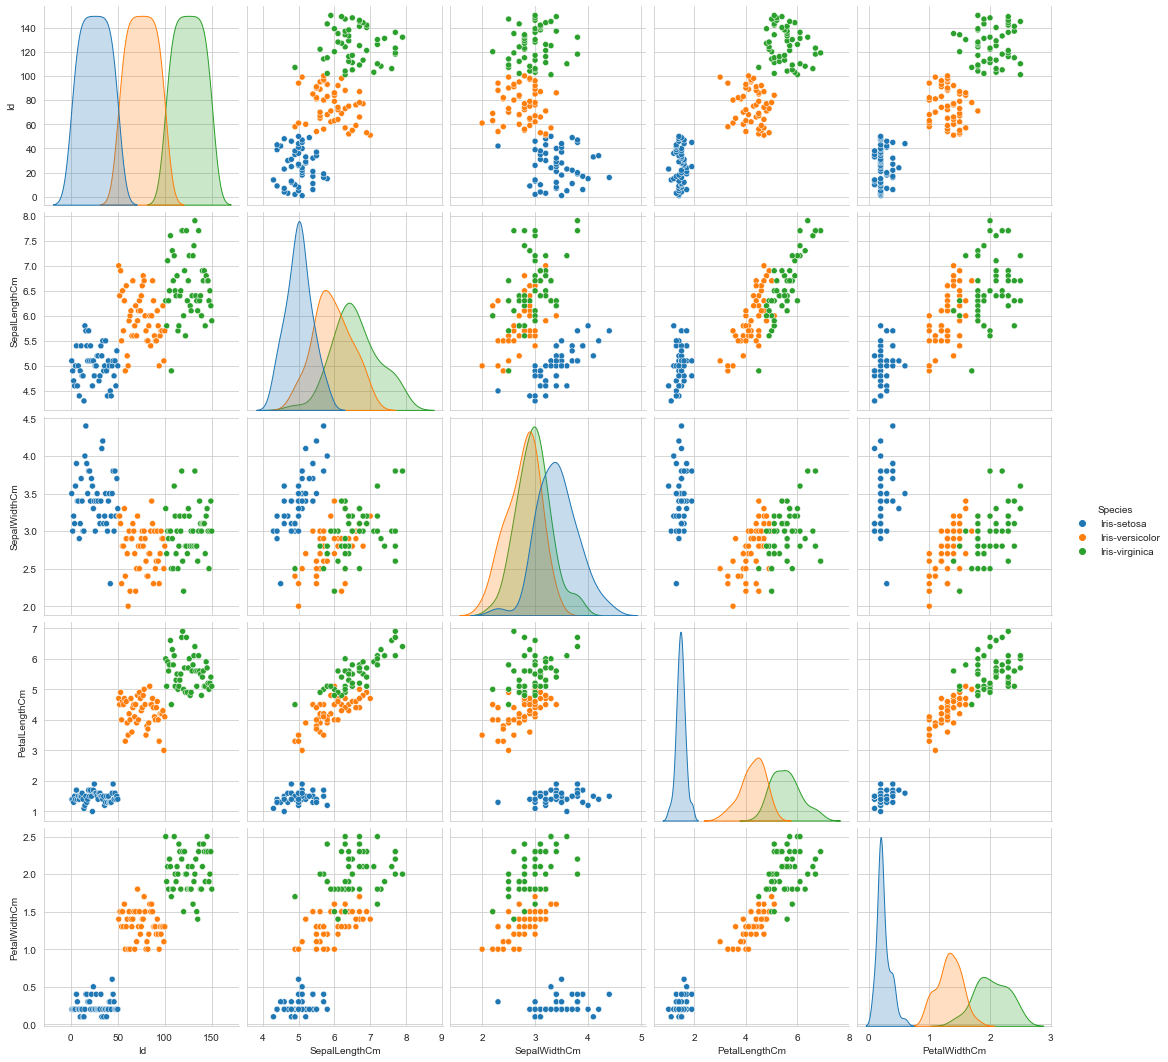

In [32]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris_data,hue='Species',height=3)
plt.show()

In [35]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
df_new = pd.DataFrame({'x':iris_data['PetalLengthCm'],'y':iris_data['PetalWidthCm']})
df_new.head()

,x,y
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [38]:
iris_data.loc[iris_data['Species']=='Iris-setosa','cluster']= '0'
iris_data.loc[iris_data['Species']=='Iris-versicolor','cluster']= '1'
iris_data.loc[iris_data['Species']=='Iris-virginica','cluster']= '2'
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [39]:
df_new['cluster']=iris_data['cluster']
df_new

,x,y,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [40]:
from sklearn.cluster import KMeans
KMean = KMeans(n_clusters=3)
KMean.fit(df_new)

KMeans(n_clusters=3)

In [41]:
KMean.cluster_centers_

array([[1.464     , 0.244     , 0.        ],
       [5.57346939, 2.03265306, 2.        ],
       [4.26470588, 1.33333333, 1.01960784]])

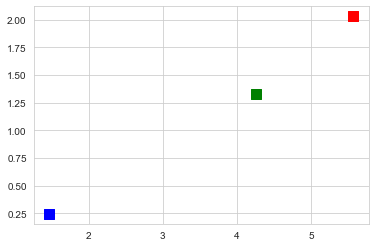

In [42]:
plt.scatter(1.464     , 0.244 ,s=100,c='blue',marker='s')
plt.scatter(4.26470588, 1.33333333,s=100,c='green',marker='s')
plt.scatter(5.57346939, 2.03265306 ,s=100,c='red',marker='s')
plt.show()

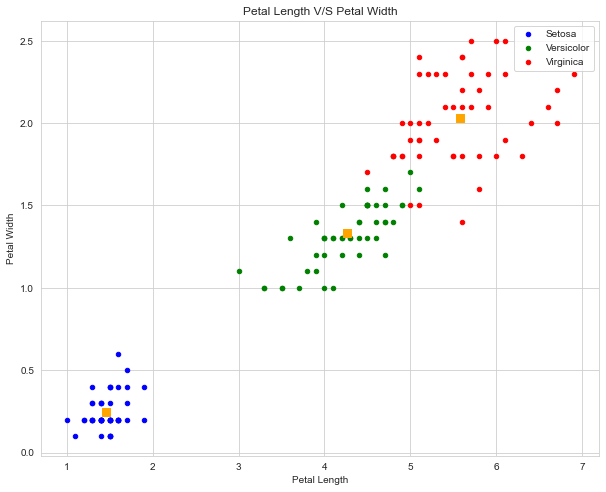

In [43]:
fig = iris_data[iris_data.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue',label="Setosa")
iris_data[iris_data.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green',label="Versicolor",ax=fig)
iris_data[iris_data.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='red',label="Virginica",ax=fig)
fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length V/S Petal Width')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.scatter(1.464     , 0.244 ,s=50,c='orange',marker='s')
plt.scatter(4.26470588, 1.33333333,s=50,c='orange',marker='s')
plt.scatter(5.57346939, 2.03265306 ,s=50,c='orange',marker='s')
plt.show()

#### Optimum number of clusters for the given iris dataset is 3 and cluster has been represented as scattered plot.